# Week 6 Assignment
IS620 | Aaron Palumbo

We start out by using the code form the NetworkX site to create the Davis Club graph

In [1]:
import IPython.display as dis

In [3]:
#!/usr/bin/env python
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al
in the 1930s.  They represent observed attendance at 14 social events
by 18 Southern women.  The graph is bipartite (clubs, women).

Data from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
__date__ = "$Date: 2005-05-12 14:33:11 -0600 (Thu, 12 May 2005) $"
__credits__ = """"""
__revision__ = "$Revision: 998 $"
#    Copyright (C) 2004 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import string
import networkx as nx

def davis_club_graph(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    G=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    G.clear()
    G.name="Davis Southern Club Women"

    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # club names
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    # parse matrix
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                G.add_edge(w[row],c[col])
        row+=1
    return (G,list(w.values()),list(c.values()))

def project(B,pv,result=False,**kwds):
    """
    Returns a graph that is the unipartite projection of the
    bipartite graph B onto the set of nodes given in list pv.

    The nodes retain their names and are connected if they share a
    common node in the vertex set of {B not pv}.

    No attempt is made to verify that the input graph B is bipartite.
    """
    if result:
        G=result
    else:
        G=nx.Graph(**kwds)
    for v in pv:
        G.add_node(v)
        for cv in B.neighbors(v):
            G.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return G


# return graph and women and clubs lists
(G,women,clubs)=davis_club_graph()

# project bipartite graph onto women nodes
W=project(G,women)
# project bipartite graph onto club nodes
C=project(G,clubs)

print("Degree distributions of projected graphs")
print('')
print("Member #Friends")
for v in W:
    print('%s %d' % (v,W.degree(v)))

print('')
print("Clubs #Members")
for v in C:
    print('%s %d' % (v,C.degree(v)))

Degree distributions of projected graphs

Member #Friends
CHARLOTTE 13
FLORA 14
BRENDA 17
MYRNA 18
PEARL 18
EVELYN 19
THERESA 19
FRANCES 17
LAURA 17
VERNE 19
NORA 19
KATHERINE 18
ELEANOR 17
HELEN 19
DOROTHY 18
OLIVIA 14
SYLVIA 19
RUTH 19

Clubs #Members
E11 10
E10 10
E13 10
E12 10
E14 10
E9 15
E8 15
E5 10
E4 10
E7 15
E6 15
E1 10
E3 10
E2 10


Let's export this to Gephi so we can make some nice plots.

In [ ]:
nx.write_gexf(W, 'women.gexf')
nx.write_gexf(C, 'clubs.gexf')

## Women

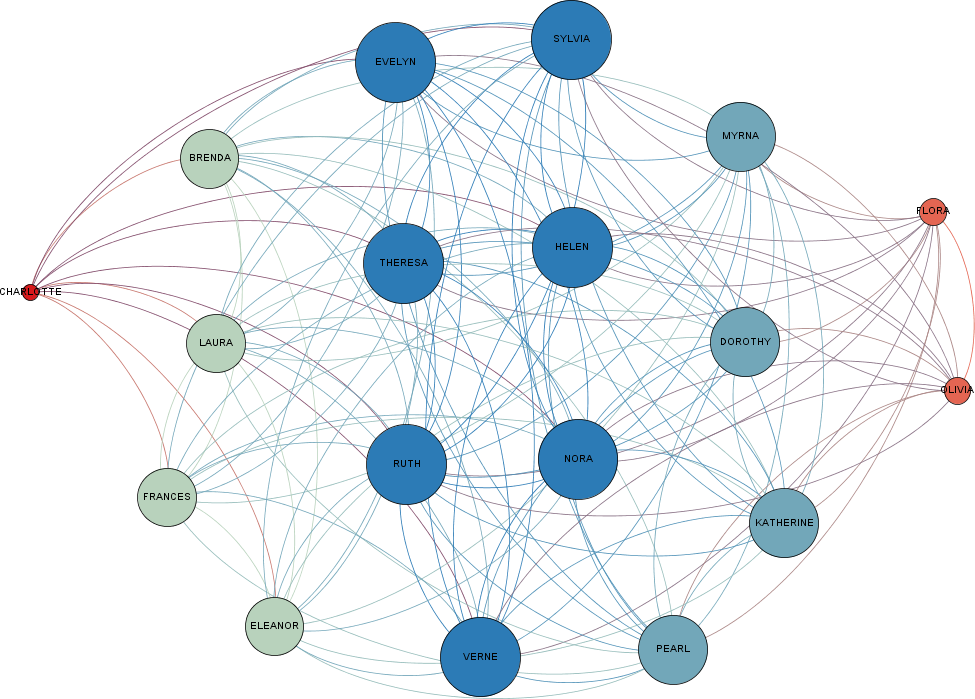

In [11]:
# First the women
# The nodes are sized by in-degree
dis.Image("women.png", width=600)

Let's look for the cliques in this group.

In [6]:
cliques = list(nx.find_cliques(W))
for i in range(len(cliques)):
    print cliques[i]

['EVELYN', 'THERESA', 'VERNE', 'NORA', 'HELEN', 'SYLVIA', 'RUTH', 'CHARLOTTE', 'LAURA', 'ELEANOR', 'BRENDA', 'FRANCES']
['EVELYN', 'THERESA', 'VERNE', 'NORA', 'HELEN', 'SYLVIA', 'RUTH', 'MYRNA', 'PEARL', 'DOROTHY', 'KATHERINE', 'FLORA', 'OLIVIA']
['EVELYN', 'THERESA', 'VERNE', 'NORA', 'HELEN', 'SYLVIA', 'RUTH', 'MYRNA', 'PEARL', 'DOROTHY', 'KATHERINE', 'BRENDA', 'LAURA', 'ELEANOR', 'FRANCES']


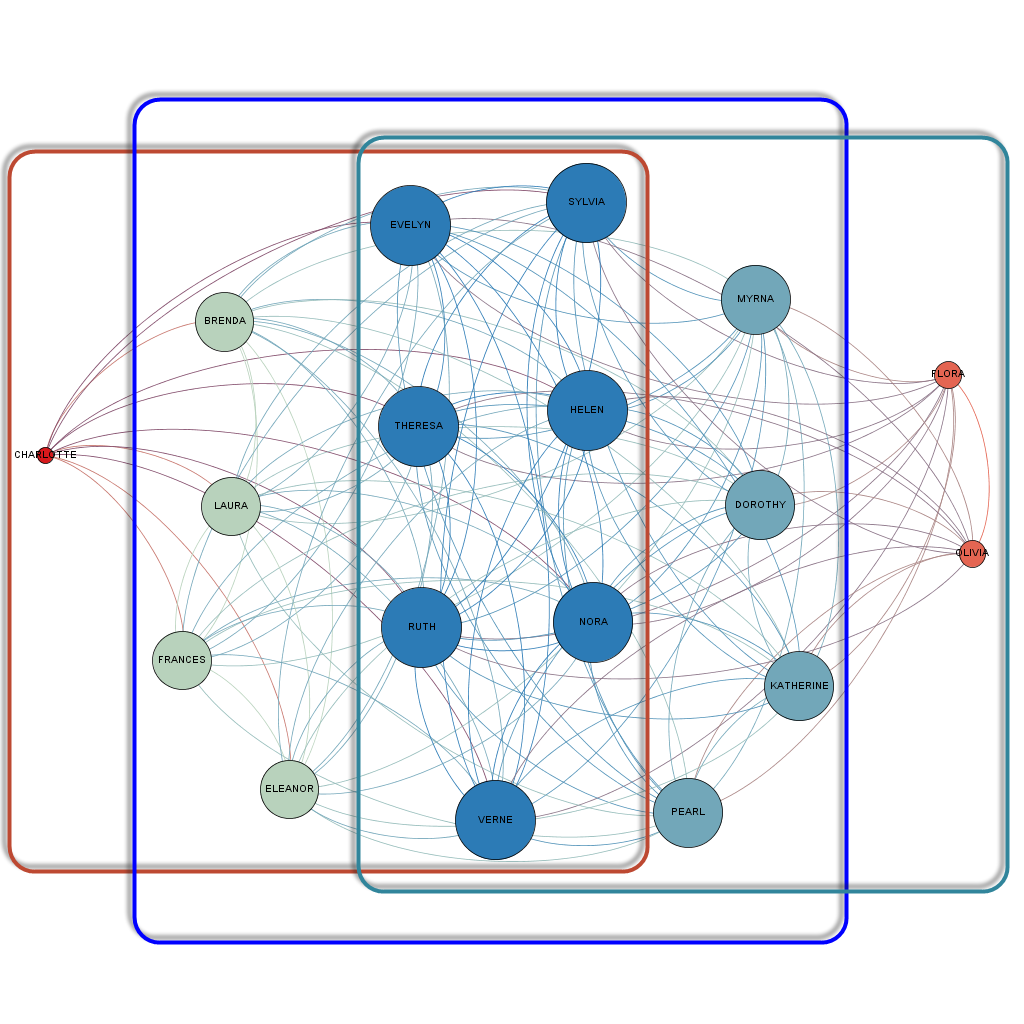

In [7]:
dis.Image("women-cliques.png", width=600)

We find the three cliques shown above.

## Events

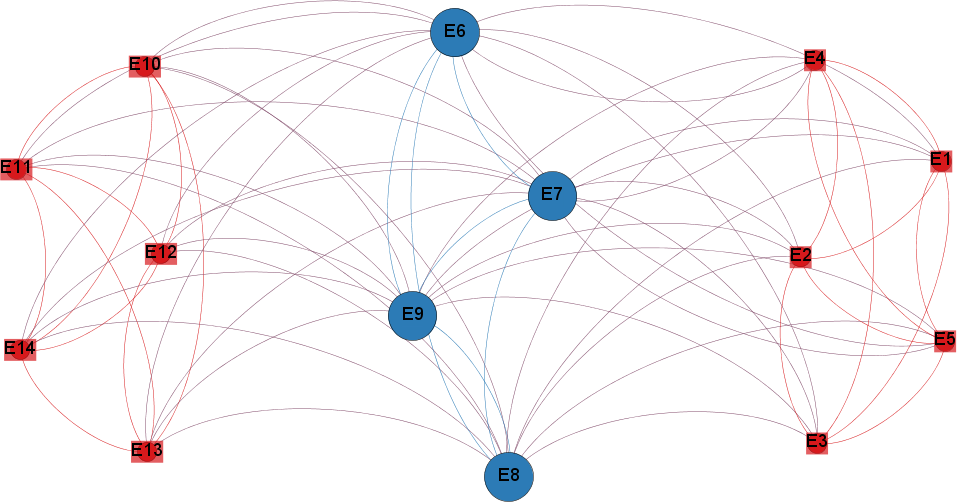

In [13]:
# Now the events
# the nodes are also sized by in-degree
dis.Image("events.png", width=600)

In [9]:
eventCliques = list(nx.find_cliques(C))
for i in range(len(eventCliques)):
    print eventCliques[i]

['E9', 'E8', 'E7', 'E6', 'E11', 'E10', 'E13', 'E12', 'E14']
['E9', 'E8', 'E7', 'E6', 'E5', 'E4', 'E1', 'E3', 'E2']


We see the following cliques in the events:

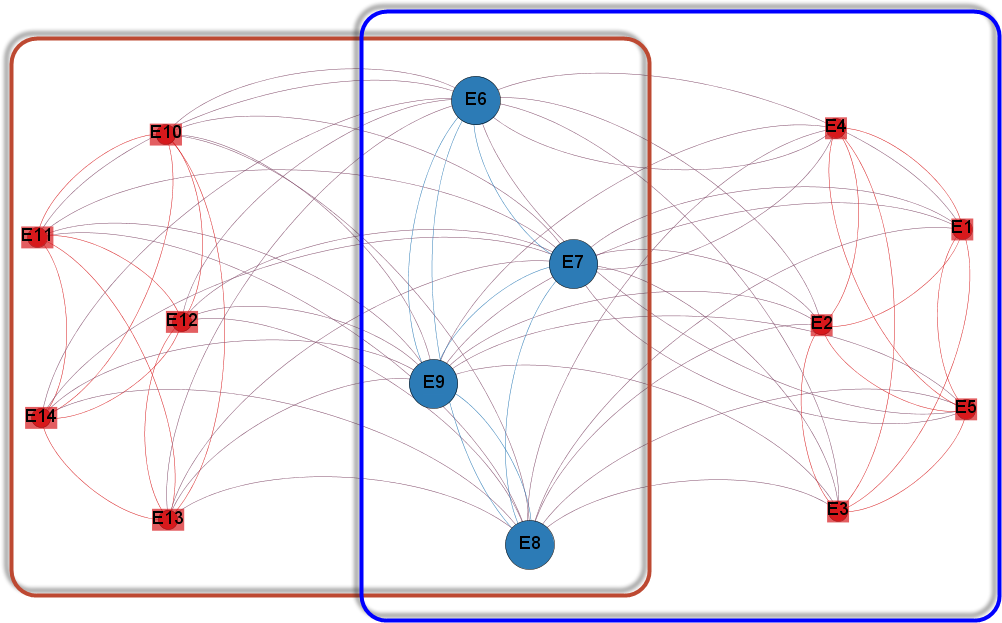

In [14]:
dis.Image("event-cliques.png", width=600)

## Conclusions

Based on the above observations, you might interpret the situation as follows:

There seems to be two different social circles in the town as evidenced by the event cliques. Given the time, you might imagine those to be based on race (black / white?). There are four events E6 - E9 that encourage an overlap between the crowds.

The cliques shown by the women represents three types of behavior. There are the women in the middle (shown in blue), who attend all the events, the women in the middle bands (shown in green) who attend all events in one of the event cliques, and the women on the edge (shown in red) who likely attend only the events exclusive to their event clique. 

One interesting question you might pose is, "who are the influencers here?" You might be tempted to declare the women in the middle as the most influencial, since they span the entire community, but it also seems possible the the women with the real power are the ones on either end, who are exclusive to their cliques. They might be the leaders of the respective cliques and as such, have more incentive to not attend the cross over events. I believe this is where domain knowledge would be important. 